# 3Blue1Brown channel's videos analysis 🔵🔵🔵🟤

---

In [1]:
import pandas as pd
import plotly
import json
import re
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

In [2]:
# CONSTANTS

my_browns = [[0.0, 'rgb(244,164,96)'], 
             [0.5, 'rgb(139,69,19)'], 
             [1.0, 'rgb(61,43,31)']]

my_blues = [[0.0, "rgb(7, 159, 224)"],
            [1, "rgb(61, 8, 84)"]]

In [3]:
def get_link(video_id):
    return f"https://www.youtube.com/watch?v={video_id}"

In [4]:
def iso_duration_converter(iso_string):
    """
    Convert ISO 8601 duration format to minutes
    """
    minutes = 0  # duration in minutes
    multipliers = {'H': 60, 'M': 1, 'S': 1/60}  # H - hour, M - minute, S - second
    pairs = re.findall(r"([0-9]+)([HMS]+)", iso_string)  # numberLetter appears?
    for pair in pairs:
        minutes += int(pair[0]) * multipliers[pair[1]]
    return minutes

___

In [5]:
with open("3blue1brown.json", 'r') as f:
    data = json.loads(f.read())

In [6]:
df = pd.DataFrame(data).transpose()
df.sample()

,publishedAt,channelId,title,description,thumbnails,channelTitle,tags,categoryId,liveBroadcastContent,localized,...,favoriteCount,commentCount,duration,dimension,definition,caption,licensedContent,contentRating,projection,defaultLanguage
P2LTAUO1TdA,2016-09-11T17:56:20Z,UCYO_jab_esuFRV4b17AJtAw,"Change of basis | Chapter 13, Essence of linea...",How do you translate back and forth between co...,{'default': {'url': 'https://i.ytimg.com/vi/P2...,3Blue1Brown,"[three brown one blue, linear algebra, brown, ...",27,none,"{'title': 'Change of basis | Chapter 13, Essen...",...,0,996,PT12M51S,2d,hd,true,True,{},rectangular,en


---
### Cleaning

In [7]:
redundant_columns = ['channelId', 'thumbnails', 'channelTitle', 'defaultAudioLanguage',
                     'categoryId', 'liveBroadcastContent', 'localized', 'dimension',
                     'licensedContent', 'contentRating', 'projection', 'caption',
                     'favoriteCount', 'definition', 'defaultLanguage']

df.drop(columns=redundant_columns, inplace=True)

In [8]:
for column_name in df:
    if 'Count' in column_name:
        df[column_name] = pd.to_numeric(df[column_name])

In [9]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['duration'] = df['duration'].apply(iso_duration_converter)

In [10]:
df.rename(columns={'publishedAt': 'publication date', 
                   'viewCount': 'views', 
                   'likeCount': 'likes',
                   'dislikeCount': 'dislikes',
                   'commentCount': 'comments'}, inplace=True)

df.index.name = 'video id'


In [11]:
df.head()

,publication date,title,description,tags,views,likes,dislikes,comments,duration
video id,,,,,,,,,
ojjzXyQCzso,2021-07-16 18:39:08+00:00,"Why aren't you making math videos? (Also, a 3...",Learn more and submit: https://3b1b.co/SoME1\n...,"[Mathematics, three blue one brown, 3 blue 1 b...",426856,23903,148,1383,24.350000
e50Bj7jn9IQ,2021-05-07 21:39:22+00:00,A quick trick for computing eigenvalues | Chap...,How to write the eigenvalues of a 2x2 matrix j...,"[Mathematics, three blue one brown, 3 blue 1 b...",330294,15185,122,1118,13.216667
O85OWBJ2ayo,2021-04-01 15:50:30+00:00,How (and why) to raise e to the power of a mat...,"General exponentials, love, Schrödinger, and m...","[Mathematics, three blue one brown, 3 blue 1 b...",970705,42648,249,2593,27.116667
lG4VkPoG3ko,2020-12-22 17:42:00+00:00,Why Bayes rule is nicer with odds,"About Likelihood Ratios, also sometimes called...","[Mathematics, three blue one brown, 3 blue 1 b...",614751,32044,223,2279,21.233333
b3NxrZOu_CE,2020-09-04 15:36:24+00:00,"Hamming codes part 2, the elegance of it all",Part 1: https://youtu.be/X8jsijhllIA\nWatch Be...,"[Mathematics, three blue one brown, 3 blue 1 b...",482037,24099,111,1506,16.833333


In [12]:
min_views_video = df[df['views'] == df['views'].min()]
print("Fewest views: \n\n ", min_views_video.T)

Fewest views: 

  video id                                                zLzLxVeqdQg
publication date                          2015-03-05 06:15:23+00:00
title                                          Euler's Formula Poem
description       A poem about why e to the pi i equals -1, base...
tags              [3 brown 1 blue, 3 blue 1 brown, three brown o...
views                                                        126108
likes                                                          3745
dislikes                                                         63
comments                                                        136
duration                                                    1.06667


In [13]:
print(get_link(min_views_video.index[0]))

https://www.youtube.com/watch?v=zLzLxVeqdQg


---

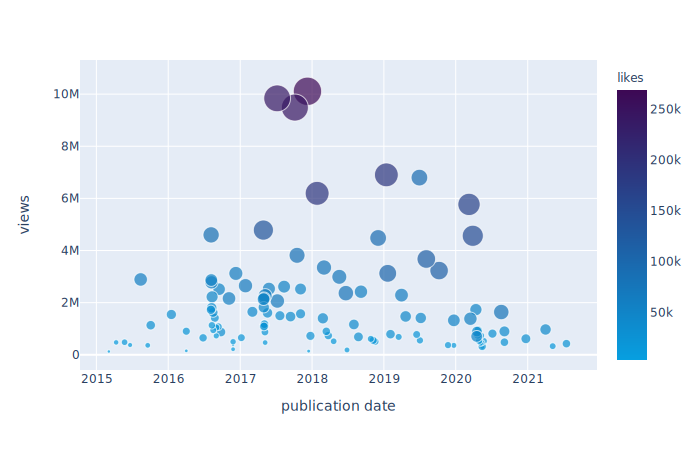

In [16]:
fig = df.plot(x='publication date', 
              y='views', 
              kind='scatter', 
              size='likes', 
              color="likes", 
              color_continuous_scale=my_blues)

fig.show("svg")

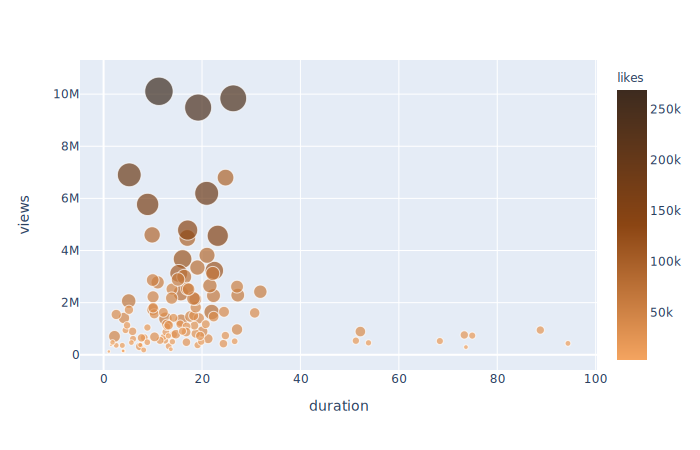

In [18]:
fig = df.plot(x='duration', 
              y='views', 
              kind='scatter', 
              size='likes', 
              color="likes", 
              color_continuous_scale=my_browns)

fig.show("svg")

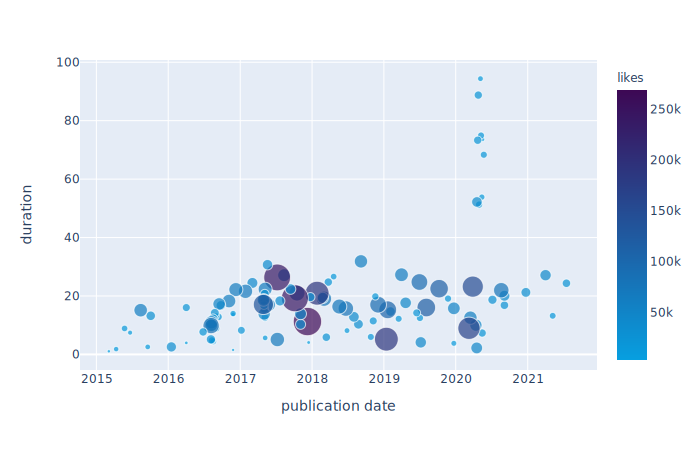

In [20]:
fig = df.plot(x='publication date', 
              y='duration', 
              kind='scatter', 
              size='likes', 
              color="likes", 
              color_continuous_scale=my_blues)

fig.show("svg")

In [21]:
phrases = ['square', 'calculus', 'derivative', ' pi ', 'vector', 'algebra', 'bayes', 'series', 'fourier', 'trick']

In [22]:
d = {}
for phrase in phrases:
    d[phrase] = df[df['title'].str.lower().str.contains(phrase)]

In [23]:
def avg(d, phrase, key):
    return d[phrase][key].sum() / len(d[phrase])

In [24]:
df_phrases = pd.DataFrame(columns=['phrase in the title',
                                   'videos',
                                   'views (average)', 
                                   'likes (average)', 
                                   'duration (average)'])

for index, phrase in enumerate(phrases):
    df_phrases.loc[index] = [phrase,
                             len(d[phrase]),
                             avg(d, phrase, 'views'), 
                             avg(d, phrase, 'likes'), 
                             avg(d, phrase, 'duration')]

df_phrases = df_phrases.sort_values("views (average)", ascending=False)
df_phrases


,phrase in the title,videos,views (average),likes (average),duration (average)
8,fourier,3,4.514463e+06,100313.333333,19.405556
7,series,3,3.206922e+06,58257.000000,19.866667
4,vector,4,2.713898e+06,56226.000000,13.470833
0,square,2,2.145362e+06,46197.000000,11.758333
3,pi,2,2.123298e+06,50344.000000,12.475000
2,derivative,4,1.853721e+06,45131.250000,14.845833
1,calculus,13,1.818593e+06,44961.307692,15.941026
5,algebra,17,1.668891e+06,33399.823529,10.943137
6,bayes,3,7.655603e+05,32345.666667,13.600000
9,trick,1,3.302940e+05,15185.000000,13.216667


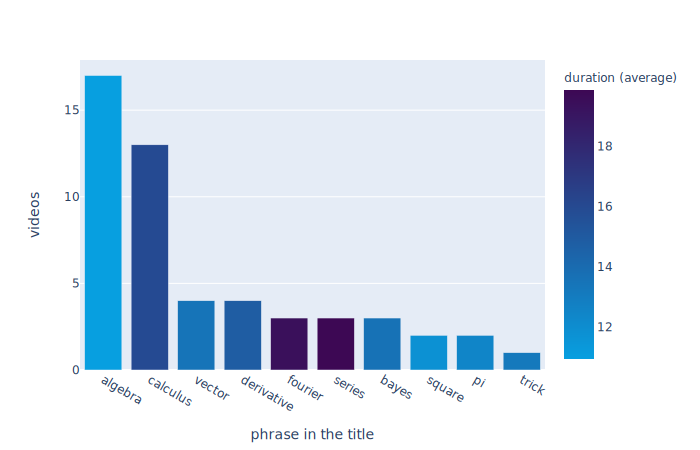

In [26]:
df_phrases = df_phrases.sort_values("videos", ascending=False)
fig = df_phrases.plot(x="phrase in the title", 
                y="videos", 
                kind='bar', 
                color='duration (average)', 
                color_continuous_scale=my_blues)

fig.show("svg")

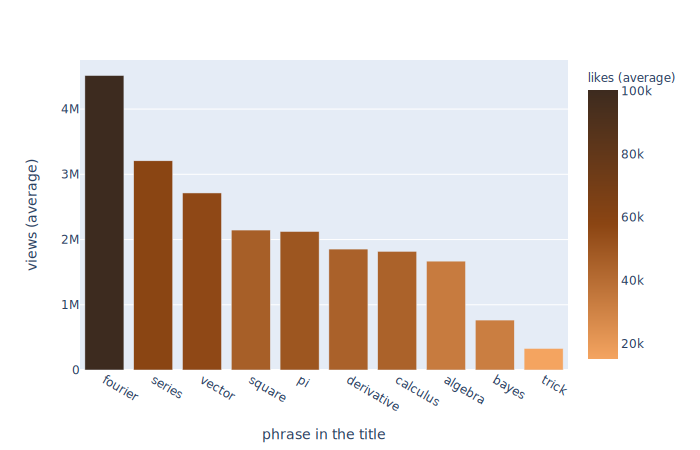

In [28]:
df_phrases = df_phrases.sort_values("views (average)", ascending=False)
fig = df_phrases.plot(x="phrase in the title", 
                y="views (average)", 
                kind='bar', 
                color='likes (average)', 
                color_continuous_scale=my_browns)

fig.show("svg")

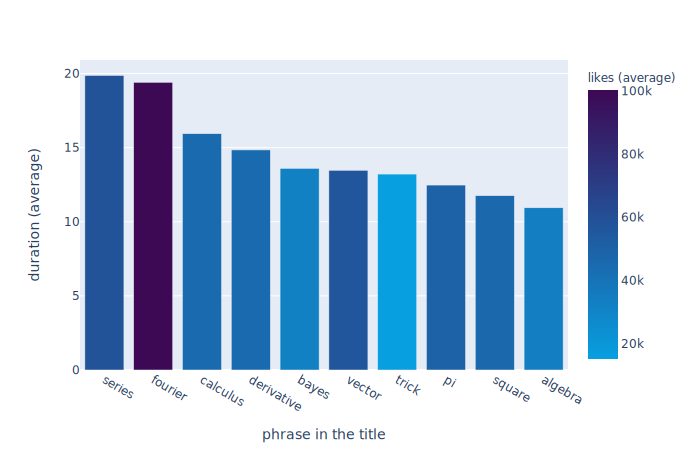

In [30]:
df_phrases = df_phrases.sort_values("duration (average)", ascending=False)
fig = df_phrases.plot(x="phrase in the title", 
                y="duration (average)", 
                kind='bar', 
                color='likes (average)', 
                color_continuous_scale=my_blues)

fig.show("svg")